In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [8]:
%matplotlib inline
file_path = "data/winefranceexport.csv"  # Modifier avec le chemin correct
df_export = pd.read_csv(file_path)


In [9]:
df_export.head()

,Name_domain,Product_name,Region,Country,Average_rating,Number_of_rates,Price,Type
0,Premius,Bordeaux Rosé 2021,Bordeaux,France,3.6,228,4.09,Rose
1,Château de Lavagnac,Bordeaux 2015,Bordeaux,France,3.6,75,4.10,Red
2,Château de Millet,Colombard - Ugni Blanc 2022,Côtes de Gascogne,France,3.6,759,4.49,White
3,Camina,Chardonnay - Viura 2021,La Mancha,Spain,3.6,25,4.50,White
4,Vinovalie,Les Blousons Noirs Malbec 2020,Cahors,France,3.6,250,4.50,Red


In [10]:
%matplotlib inline
file_path = "data/winemag.csv"  # Modifier avec le chemin correct
df_mag = pd.read_csv(file_path)
df_mag = df_mag[df_mag["country"] == "France"]

In [11]:
df_mag.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
11,11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
30,30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
42,42,France,"This is a festive wine, with soft, ripe fruit ...",Nouveau,86,9.0,Beaujolais,Beaujolais,NaN,Roger Voss,@vossroger,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy


In [12]:
# join des deux dataframes sur la colonne 'Region' de df_export et 'region_1' de df_mag

wine_data = pd.merge(df_export, df_mag, left_on='Region', right_on='region_1', how='inner')
wine_data.head(5)

,Name_domain,Product_name,Region,Country,Average_rating,Number_of_rates,Price,Type,id,country,...,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Premius,Bordeaux Rosé 2021,Bordeaux,France,3.6,228,4.09,Rose,578,France,...,89,15.0,Bordeaux,Bordeaux,NaN,Roger Voss,@vossroger,Château Maison Noble Saint Martin 2015 Château...,Bordeaux-style Red Blend,Château Maison Noble Saint Martin
1,Premius,Bordeaux Rosé 2021,Bordeaux,France,3.6,228,4.09,Rose,934,France,...,87,15.0,Bordeaux,Bordeaux,NaN,Roger Voss,@vossroger,Château Saintongey 2014 Vieilles Vignes (Bord...,Bordeaux-style Red Blend,Château Saintongey
2,Premius,Bordeaux Rosé 2021,Bordeaux,France,3.6,228,4.09,Rose,1132,France,...,84,14.0,Bordeaux,Bordeaux,NaN,Roger Voss,@vossroger,Château les Joyeuses 2014 Bordeaux,Bordeaux-style Red Blend,Château les Joyeuses
3,Premius,Bordeaux Rosé 2021,Bordeaux,France,3.6,228,4.09,Rose,1145,France,...,83,12.0,Bordeaux,Bordeaux,NaN,Roger Voss,@vossroger,Les Vignerons Réunis de Monségur 2014 La Tour ...,Bordeaux-style Red Blend,Les Vignerons Réunis de Monségur
4,Premius,Bordeaux Rosé 2021,Bordeaux,France,3.6,228,4.09,Rose,1238,France,...,88,9.0,Bordeaux,Bordeaux,NaN,Roger Voss,@vossroger,Barrière Frères 2006 Jacques Sans Souci (Bord...,Bordeaux-style Red Blend,Barrière Frères


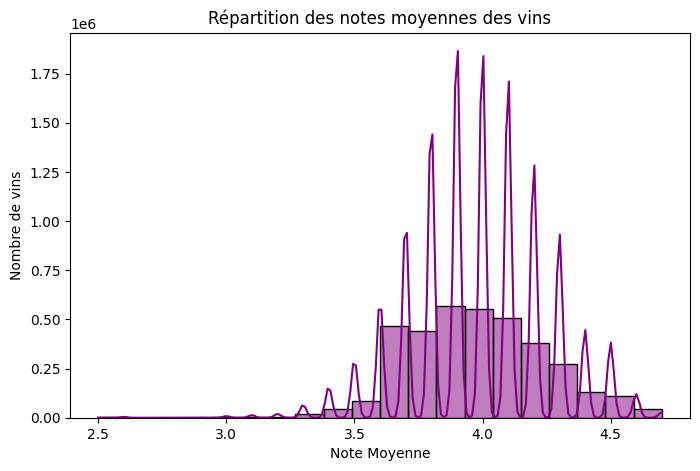

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(wine_data['Average_rating'], bins=20, kde=True, color='purple')
plt.xlabel("Note Moyenne")
plt.ylabel("Nombre de vins")
plt.title("Répartition des notes moyennes des vins")
plt.show()

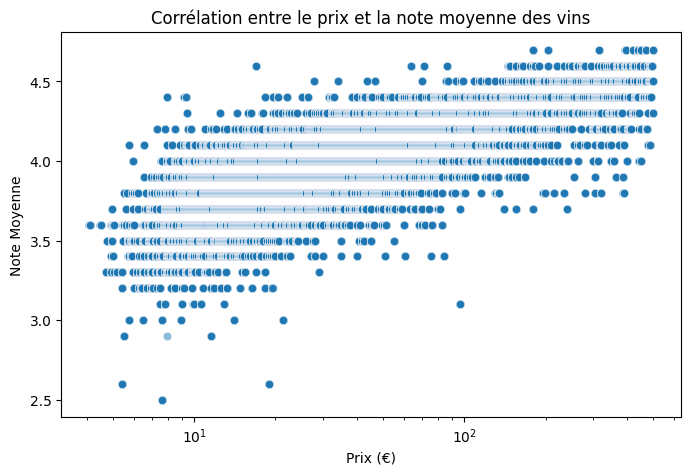

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=wine_data, x='Price', y='Average_rating', alpha=0.5)
plt.xlabel("Prix (€)")
plt.ylabel("Note Moyenne")
plt.title("Corrélation entre le prix et la note moyenne des vins")
plt.xscale("log")  # Mettre une échelle logarithmique si les prix varient fortement
plt.show()

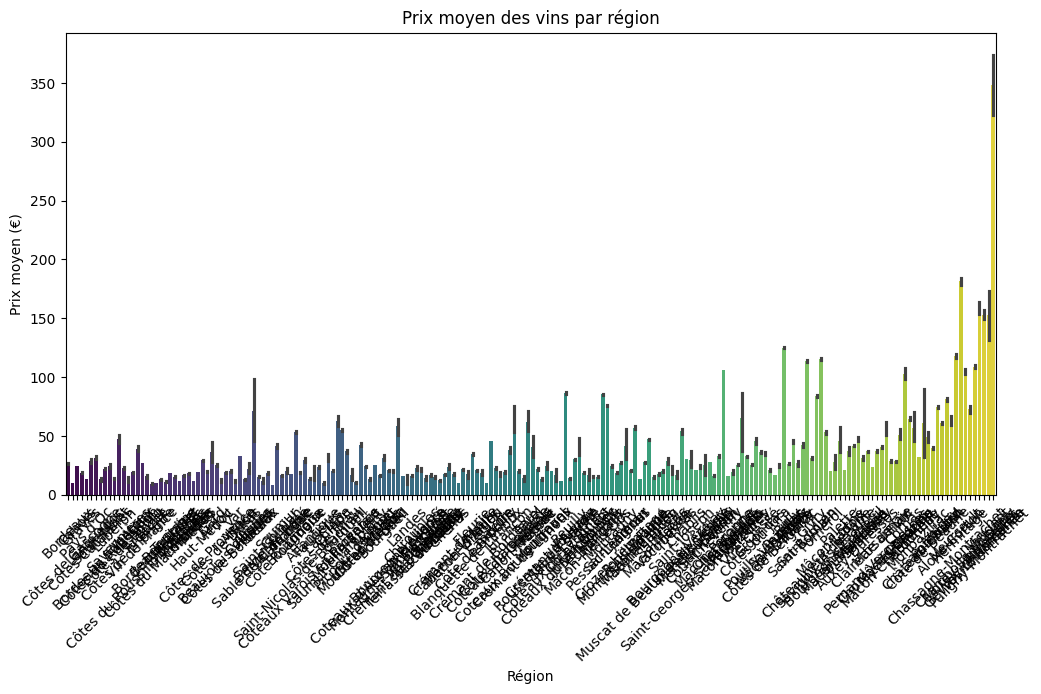

In [19]:
# barplot du prix moyen des vins par région
plt.figure(figsize=(12, 6))
sns.barplot(data=wine_data, x='Region', y='Price', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Région")
plt.ylabel("Prix moyen (€)")
plt.title("Prix moyen des vins par région")
plt.show()


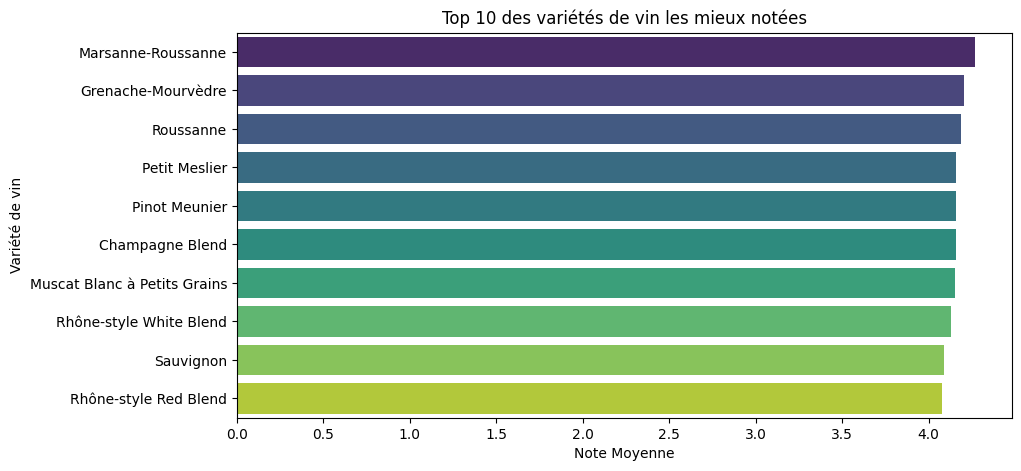

In [16]:
import warnings
warnings.filterwarnings("ignore")

top_varieties = (wine_data.groupby('variety')['Average_rating']
                 .mean()
                 .sort_values(ascending=False)
                 .head(10))
plt.figure(figsize=(10, 5))
sns.barplot(x=top_varieties.values, y=top_varieties.index, palette="viridis")
plt.xlabel("Note Moyenne")
plt.ylabel("Variété de vin")
plt.title("Top 10 des variétés de vin les mieux notées")
plt.show()

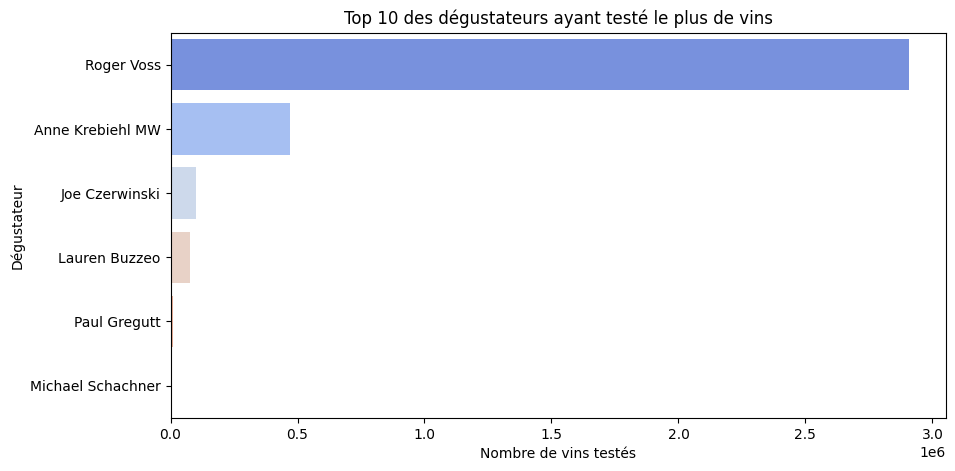

In [17]:
plt.figure(figsize=(10, 5))
tasters_counts = wine_data['taster_name'].value_counts().head(10)  # Top 10 des dégustateurs
sns.barplot(x=tasters_counts.values, y=tasters_counts.index, palette="coolwarm")
plt.xlabel("Nombre de vins testés")
plt.ylabel("Dégustateur")
plt.title("Top 10 des dégustateurs ayant testé le plus de vins")
plt.show()


In [20]:
import folium
from folium import Choropleth

gdf = gpd.read_file("./map/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
export_counts = wine_data['country'].value_counts().reset_index()
export_counts.columns = ['country', 'export_count']
gdf = gdf.merge(export_counts, left_on='NAME', right_on='country', how='left')

gdf['export_count'] = gdf['export_count'].fillna(0)

# Création de la carte interactive
m = folium.Map(location=[20, 0], zoom_start=2)
Choropleth(
    geo_data=gdf,
    data=gdf,
    columns=['NAME', 'export_count'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Nombre de vins exportés'
).add_to(m)

# Sauvegarde de la carte interactive
m.save("wine_exports_map.html")
print("Carte interactive enregistrée sous 'wine_exports_map.html'")

Carte interactive enregistrée sous 'wine_exports_map.html'
